To find the neural network that can classify the images as accurately as possible, we use an 80/20 train test split through the use of PyTorch in a Jupyter notebook for this problem.

In [30]:
!pip install torch torchvision

Firstly, set necessary imports, and set the batch size for training and tesing to 4, define a transformation to apply to the images of 32*32

In [41]:
# Necessary Imports
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [45]:
# Set the directory where your data is stored
data_dir = r'C:\Users\Siris\Desktop\UT Austin\DATA MINING\HW4\EuroSAT_RGB'

# Set the batch size for training and testing
batch_size = 4

# Define a transformation to apply to the images
transform = transforms.Compose(
    [transforms.Resize((32, 32)),  # Resize images to 32x32
     transforms.ToTensor(),  # Convert image to PyTorch Tensor data type
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # Normalize the images

Set 2 layers of convolutions, in 10 epoches:

Epoch 1, Loss: 1.6917541412981572
Epoch 2, Loss: 1.1620475119103988
Epoch 3, Loss: 0.9357443873409836
Epoch 4, Loss: 0.8050874051512908
Epoch 5, Loss: 0.6917304687366683
Epoch 6, Loss: 0.6051972302721589
Epoch 7, Loss: 0.5476186769722564
Epoch 8, Loss: 0.4774237452176833
Epoch 9, Loss: 0.41734543599355134
Epoch 10, Loss: 0.363583017053849
Accuracy of the network on the 5400 test images: 76%


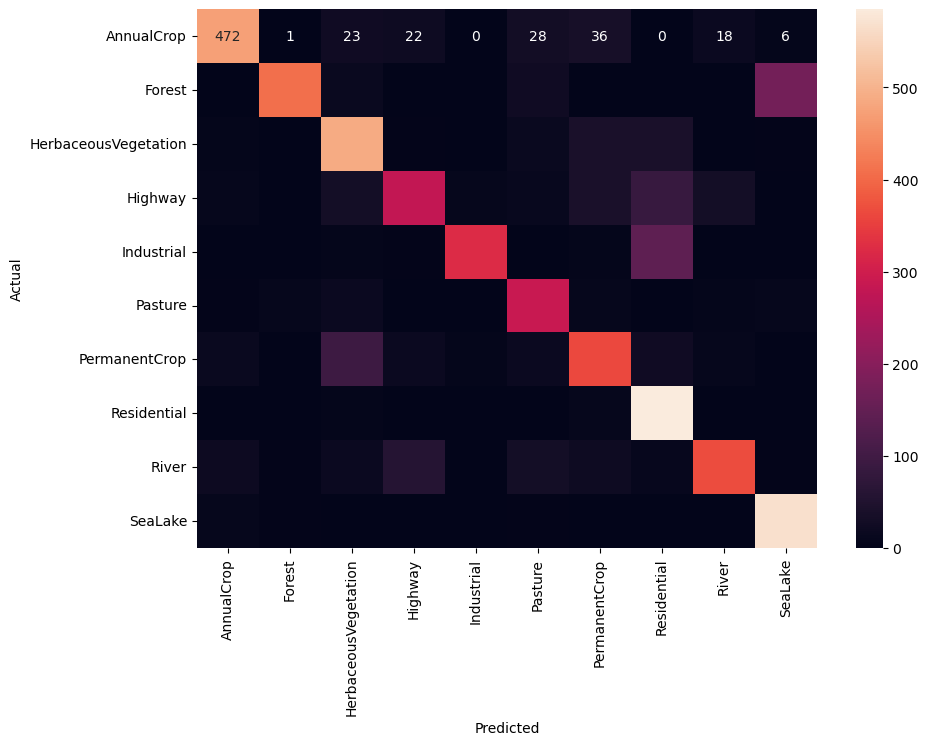

In [52]:
# Load the dataset
dataset = ImageFolder(root=data_dir, transform=transform)

# Creating Train and Test Splits
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the Neural Network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(8 * 8 * 64, 512)  # Corrected the flattening size
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, len(dataset.classes))
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x
        
net = Net()

# Train the Network
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}')

# Evaluate the Model
correct = 0
total = 0
predictions = []
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        predictions.append((labels, predicted))

print(f'Accuracy of the network on the {test_size} test images: {100 * correct // total}%')

# Generate a confusion matrix
y_true = [label.item() for batch in predictions for label in batch[0]]
y_pred = [pred.item() for batch in predictions for pred in batch[1]]
conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The accuracy is 76%.

Set 3 layers of convolutions, in 10 epoches:

In [53]:
# Define the Neural Network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)  
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(2048 , 512)  
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, len(dataset.classes))
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

Epoch 1, Loss: 1.742134058525165
Epoch 2, Loss: 1.0924803275732256
Epoch 3, Loss: 0.8648180160774953
Epoch 4, Loss: 0.738349261645883
Epoch 5, Loss: 0.6402427593135723
Epoch 6, Loss: 0.5415999864476423
Epoch 7, Loss: 0.47394506097965255
Epoch 8, Loss: 0.4077014253906371
Epoch 9, Loss: 0.3563752009569025
Epoch 10, Loss: 0.3094131575263115
Accuracy of the network on the 5400 test images: 83%


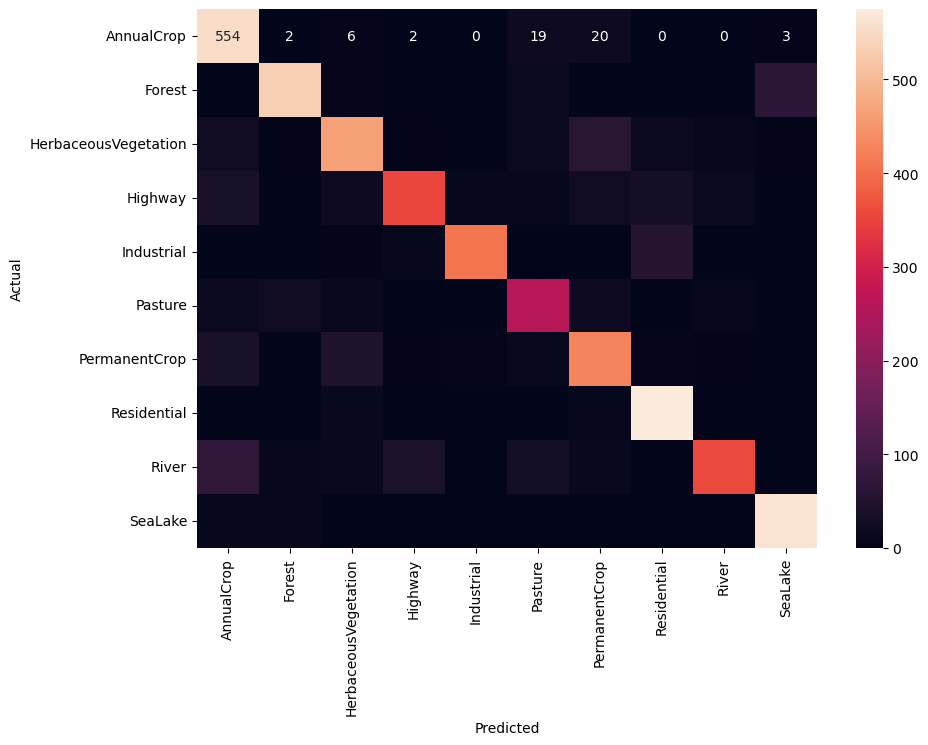

In [54]:
# Train the Network
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}')

# Evaluate the Model
correct = 0
total = 0
predictions = []
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        predictions.append((labels, predicted))

print(f'Accuracy of the network on the {test_size} test images: {100 * correct // total}%')

# Generate a confusion matrix
y_true = [label.item() for batch in predictions for label in batch[0]]
y_pred = [pred.item() for batch in predictions for pred in batch[1]]
conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The accuracy is now improved to 83%. 
The model's training process over 10 epochs shows a consistent decrease in loss, which is a good indicator of learning. Starting with a loss of approximately 1.74 in the first epoch, it ended with a loss of about 0.31 in the tenth epoch. This reduction in loss suggests that the network's weights and biases are being adjusted to minimize the error in predictions over time.
Now run a sample test:

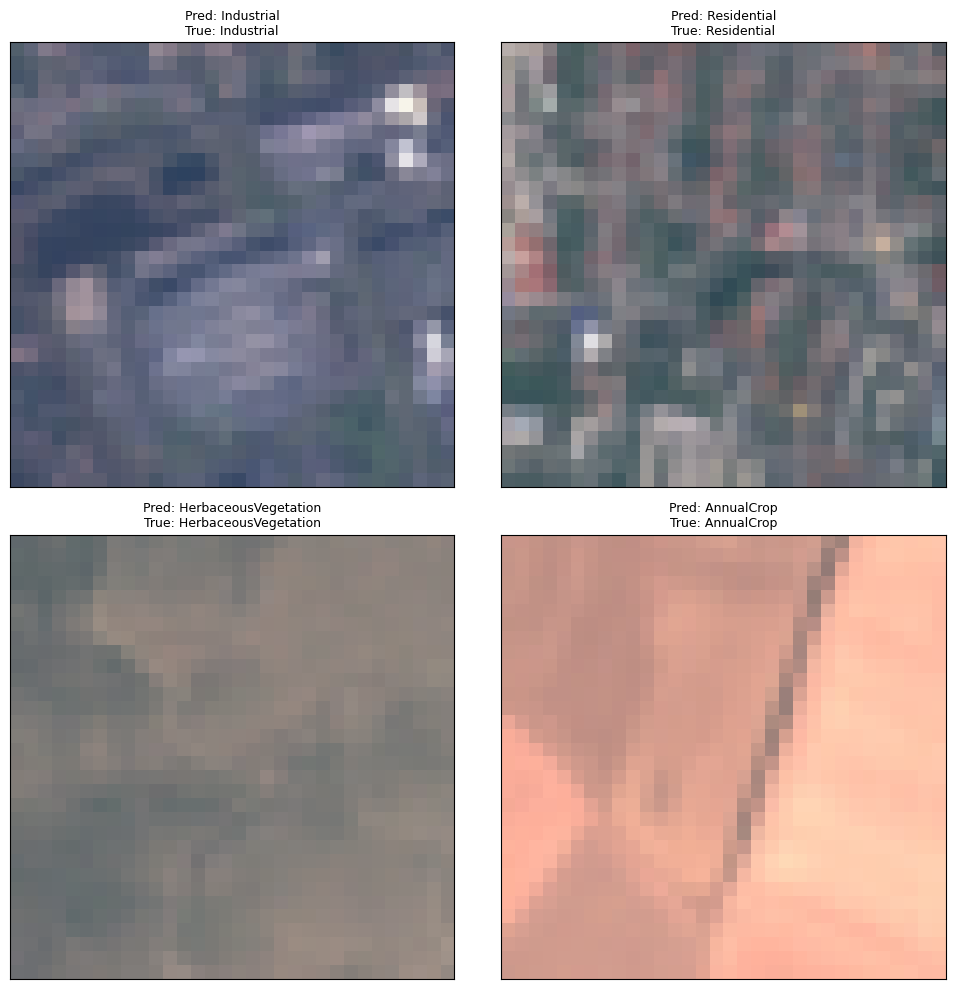

In [55]:
net.eval()

# No need to track gradients here
with torch.no_grad():
    # Get some random test images and labels
    dataiter = iter(test_loader)
    
    # Corrected line with the next function
    images, true_labels = next(dataiter)
    
    # Run your model to get predictions
    outputs = net(images)
    
    # The predicted class is the one with the highest output score
    _, predicted_labels = torch.max(outputs, 1)

# Now call the function to plot the images with labels
plot_images(images, true_labels, predicted_labels, dataset.classes)


T
   The network has achieved a test accura8y , wata. While not perf 8t, a 73% accuracy indicatesthet your model has learned significant features from the trainin. s:**
   The sample predictions shown reveal the model's output on individual test set images. Each sub-image is annotated with the predicted class and the actual class. In the givenallthat most predictions match the true labels, which is consistent with a model that has a decent level of iling to capture.